In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("train.csv")

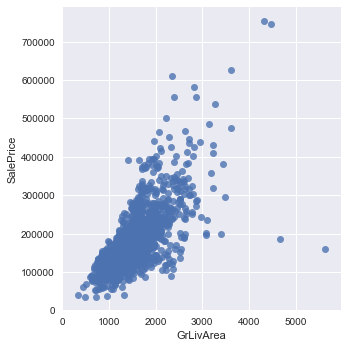

In [3]:
sns.lmplot('GrLivArea', 'SalePrice', data=data, fit_reg=False)
plt.show()

In [20]:
data['Normalized_Area'] = (data['GrLivArea'] - data['GrLivArea'].mean())/data['GrLivArea'].std()

#Grab the relevant data, scale the predictor variable for the gradient descent...
x = data['Normalized_Area']
y = data['SalePrice']

In [28]:
#GRADIENT DESCENT

alpha = 0.001 #Step size
iterations = 2000 #No. of iterations
m = y.size #No. of data points
np.random.seed(123) #Set the seed
theta = np.random.rand(2) #Pick some random values to start with

print(theta)

[ 0.69646919  0.28613933]


In [32]:
#GRADIENT DESCENT
def gradient_descent(x, y, theta, iterations, alpha):
    """
    TODO: Implement the algorithm
    Pseudocode
    for i to iterations
        compute current cost value
        compute gradients
        update theta => thetha = thetha - alpha * gradient
    return theta and cost
    """
    count = 0
    while(count < iterations):
        cost = (1/(2*m)) * ((( (x*theta[1]+theta[0]) -y)**2).sum())
        theta[0] = theta[0]-(alpha/m)*((( (x*theta[1]+theta[0]) -y)).sum())
        theta[1] = theta[1]-(alpha/m)*(((( (x*theta[1]+theta[0]) -y))*x).sum())     
        count = count + 1
    return theta, cost

#Pass the relevant variables to the function and get the new values back...
theta, cost = gradient_descent(x, y, theta, iterations, alpha)

#Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 156460.76, 48673.43


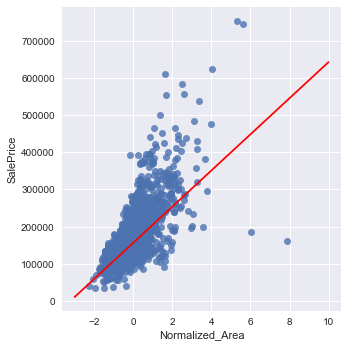

In [33]:
#Plot the regression line obtained from our algorithm
x_line = np.linspace(-3, 10, 100)
y_line = theta[0] + theta[1] * x_line
sns.lmplot('Normalized_Area', 'SalePrice', data=data, fit_reg=False)
plt.plot(x_line, y_line, 'r')
plt.show()